<a href="https://colab.research.google.com/github/Darkdew/Churn_Modelling-_ANN_Project/blob/master/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

# **Test whether GPU is working**


In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# **Which GPU are we using**

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16130311104417537659, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13638392141159481286
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6930206552433464429
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701463552
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 377622347712288709
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [1]:
# For RAM Information
!cat /proc/meminfo

MemTotal:       13333540 kB
MemFree:        10470380 kB
MemAvailable:   12456620 kB
Buffers:           75408 kB
Cached:          2067960 kB
SwapCached:            0 kB
Active:           737200 kB
Inactive:        1843444 kB
Active(anon):     416484 kB
Inactive(anon):      336 kB
Active(file):     320716 kB
Inactive(file):  1843108 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              2624 kB
Writeback:             0 kB
AnonPages:        437268 kB
Mapped:           245716 kB
Shmem:               952 kB
Slab:             166708 kB
SReclaimable:     126800 kB
SUnreclaim:        39908 kB
KernelStack:        4128 kB
PageTables:         5952 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666768 kB
Committed_AS:    2803764 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:              920 kB
AnonHugePages:   

In [0]:
!pip install -q keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 5s 905us/step - loss: 0.5643 - accuracy: 0.7862 - val_loss: 0.4985 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 3s 555us/step - loss: 0.5285 - accuracy: 0.7893 - val_loss: 0.4829 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 3s 569us/step - loss: 0.4978 - accuracy: 0.7934 - val_loss: 0.4725 - val_accuracy: 0.7955
Epoch 4/100
5359/5359 [==============================] - 3s 579us/step - loss: 0.4954 - accuracy: 0.7940 - val_loss: 0.4680 - val_accuracy: 0.7955
Epoch 5/100
5359/5359 [==============================] - 3s 570us/step - loss: 0.4882 - accuracy: 0.7947 - val_loss: 0.4633 - val_accuracy: 0.7955
Epoch 6/100
5359/5359 [==============================] - 3s 571us/step - loss: 0.4805 - accuracy: 0.7957 - val_loss: 0.4603 - val_accuracy: 0.7955
Epoch 7/100
5359/5359 [==============================] - 3s 579us/step

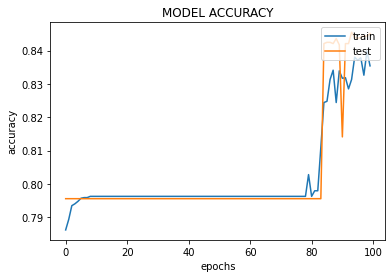

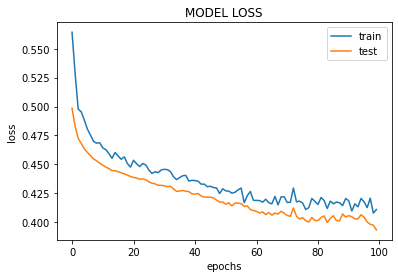

0.8615


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('/content/drive/My Drive/Colab Notebooks/Churn_Modelling.csv')
X= df.iloc[:, 3:13]
y= df.iloc[:, 13]

#Create Dummy variables for categorical features
geography= pd.get_dummies(X['Geography'], drop_first= True)
gender= pd.get_dummies(X['Gender'], drop_first=True)

#concatenate the dummy columns to the df X
X = pd.concat([X, geography, gender], axis= 1)

#we can drop the original categorical columns
X= X.drop(['Gender', 'Geography'], axis=1)

#Splitting dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state= 0)

#Scaling our Features
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_train= ss.fit_transform(X_train)
X_test= ss.transform(X_test)



#Time for ANN creation

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU, ELU
from keras.layers import Dropout

#ANN Initialisation
classifier2 = Sequential()


#Defining the first hidden layer and adding the input layer as well
classifier2.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))
classifier2.add(Dropout(0.3))
#adding another hidden layer with 6 neurons
classifier2.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))
classifier2.add(Dropout(0.2))
#adding the output layer
classifier2.add(Dense(units=1, kernel_initializer='glorot_uniform', activation= 'sigmoid'))

#Compiling our ANN
classifier2.compile(optimizer='Adamax', loss= 'binary_crossentropy', metrics=['accuracy'])

classifier2.summary()

#Fitting our ANN to the training set
model0= classifier2.fit(X_train, y_train, validation_split= 0.33, batch_size=10, nb_epoch=100)

#listing all data in our model0
print(model0.history.keys())

#Summarize model for accuracy
plt.plot(model0.history['accuracy'])
plt.plot(model0.history['val_accuracy'])

plt.title('MODEL ACCURACY')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc= 'upper right')
plt.show()

#Summarize model for Loss
plt.plot(model0.history['loss'])
plt.plot(model0.history['val_loss'])
plt.title('MODEL LOSS')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()


#Prediction and MODEL Evaluation

#predicting the test set results
y_pred= classifier2.predict(X_test)
y_pred= (y_pred > 0.5)

#Drawing Confusion Matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

#calculate the accuracy
from sklearn.metrics import accuracy_score
score= accuracy_score(y_pred, y_test)

print(score)